In [75]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [77]:
data = pd.read_csv("Steel_industry_data.csv")
print(data.head())

               date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [26]:
#To drop columns which has missing values
data = data.dropna()

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [30]:
#Building Isolation Forest model
column_input = ["Usage_kWh", "NSM"]

In [36]:
#contamination (how much of the overall data to be considered as an outlier) =0.1 (Only 0-0.5 can be considered), that means 10% of the data is to be considered as outliers
#random_state= how many times will we be able to run the code
model_IF = IsolationForest(contamination=0.1, random_state = 50)

In [38]:
model_IF.fit(data[column_input])

IsolationForest(contamination=0.1, random_state=50)

In [40]:
data["scores"] = model_IF.decision_function(data[column_input])

--------------------------------

In [44]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

data = pd.read_csv("Steel_industry_data.csv")
print(data.head())

               date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.

In [46]:
class IsolationForestOutlier:
    def __init__(self, contamination=0.1, random_state=50):
        self.contamination = contamination
        self.random_state = random_state
        self.model = IsolationForest(contamination=contamination, random_state=random_state)

In [55]:
    def fit(self, data):
        self.data = data
        self.model.fit(data)
        

In [57]:
    def predict(self):
        predictions = self.model.predict(self.data)
        return predictions

In [59]:
    def anomaly_scores(self):
        scores = self.model.deceision_function(self.data)
        return scores

In [61]:
    def visualize(self, column_x, column_y):
        """
        Visualize the data with outliers highlighted.

        Parameters:
        - column_x: Index or name of the first column for the x-axis.
        - column_y: Index or name of the second column for the y-axis.
        """
        predictions = self.predict()
        plt.scatter(
            self.data[:, column_x],
            self.data[:, column_y],
            c=["red" if pred == -1 else "blue" for pred in predictions],
            label="Data",
        )
        plt.title("Isolation Forest Outlier Detection")
        plt.xlabel(f"Feature {column_x}")
        plt.ylabel(f"Feature {column_y}")
        plt.legend(["Outliers", "Inliers"])
        plt.show()

In [65]:
# Example Usage
if __name__ == "__main__":
    # Generate synthetic data
    np.random.seed(42)
    inliers = np.random.normal(0, 1, (100, 2))
    outliers = np.random.uniform(low=-6, high=6, size=(10, 2))
    data = np.vstack((inliers, outliers))

    # Initialize the detector
    detector = IsolationForestOutlier(contamination=0.1)

    # Fit the model
    detector.fit(data)

    # Predict outliers
    predictions = detector.predict()
    print("Predictions (1: inlier, -1: outlier):")
    print(predictions)

    # Get anomaly scores
    scores = detector.anomaly_scores()
    print("Anomaly Scores:")
    print(scores)

    # Visualize the results
    detector.visualize(0, 1)

AttributeError: 'IsolationForestOutlier' object has no attribute 'fit'

Dataset loaded successfully!
               date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   


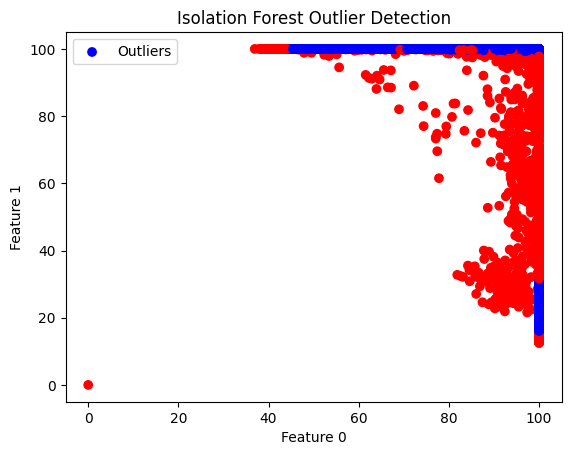

In [72]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

class IsolationForestDetector:
    def __init__(self, contamination=0.1, random_state=42):
        self.contamination = contamination
        self.random_state = random_state
        self.model = IsolationForest(contamination=contamination, random_state=random_state)
        self.data = None
        self.predictions = None

    def load_data(self, file_path, columns):
        """
        Load a dataset from a CSV file and select specific columns for analysis.

        Parameters:
        - file_path: Path to the CSV file.
        - columns: List of column names or indices to use for outlier detection.
        """
        try:
            df = pd.read_csv(file_path)
            print("Dataset loaded successfully!")
            print(df.head())
            self.data = df[columns].values  # Select specific columns and convert to NumPy array
        except Exception as e:
            print(f"Error loading dataset: {e}")

    #Fit the Isolation Forest model to the data.
    def fit(self):
        if self.data is not None:
            self.model.fit(self.data)
            print("Isolation Forest model trained.")
        else:
            print("No data available. Please load the dataset first.")

    #Predict whether each data point is an inlier (1) or an outlier (-1).
    def predict(self):
        #Returns:
        #predictions: Array of predictions (1 for inliers, -1 for outliers).
        if self.data is not None:
            self.predictions = self.model.predict(self.data)
            return self.predictions
        else:
            print("No data available. Please load the dataset first.")
            return None

    #Get the anomaly scores for each data point.
    def anomaly_scores(self):
        #Returns:
        #scores: Array of anomaly scores (lower scores indicate anomalies).
        if self.data is not None:
            scores = self.model.decision_function(self.data)
            return scores
        else:
            print("No data available. Please load the dataset first.")
            return None

    def visualize(self, column_x=0, column_y=1):
        """
        Visualize the data with outliers highlighted.

        Parameters:
        - column_x: Index of the first column for the x-axis (default: 0).
        - column_y: Index of the second column for the y-axis (default: 1).
        """
        if self.data is not None and self.predictions is not None:
            plt.scatter(
                self.data[:, column_x],
                self.data[:, column_y],
                c=["red" if pred == -1 else "blue" for pred in self.predictions],
            )
            plt.title("Isolation Forest Outlier Detection")
            plt.xlabel(f"Feature {column_x}")
            plt.ylabel(f"Feature {column_y}")
            plt.legend(["Outliers", "Inliers"], loc="best")
            plt.show()
        else:
            print("No data or predictions available for visualization.")

# Example Usage
if __name__ == "__main__":
    # Initialize the detector
    detector = IsolationForestDetector(contamination=0.1)

    # Load a dataset (replace 'your_dataset.csv' with your actual dataset file)
    # Example: The dataset should have columns "Feature1" and "Feature2"
    detector.load_data("Steel_industry_data.csv", ["Lagging_Current_Power_Factor", "Leading_Current_Power_Factor"])

    # Fit the model
    detector.fit()

    # Predict outliers
    predictions = detector.predict()
    print("Predictions (1: inlier, -1: outlier):")
    print(predictions)

    # Get anomaly scores
    scores = detector.anomaly_scores()
    print("Anomaly Scores:")
    print(scores)

    # Visualize the results
    detector.visualize(0, 1)
